In [1]:
import gdal
#import osgeo as osr
from gdal import osr
import geopandas as pd
import numpy as np
import cv2
def geo2imagexy(dataset, x, y):
    
    trans = dataset.GetGeoTransform()
    a = np.array([[trans[1], trans[2]], [trans[4], trans[5]]])
    b = np.array([x - trans[0], y - trans[3]])
    return np.linalg.solve(a, b)

def getSRSPair(dataset):
    prosrs = osr.SpatialReference()
    prosrs.ImportFromWkt(dataset.GetProjection())
    geosrs = prosrs.CloneGeogCS()
    return prosrs, geosrs
def lonlat2geo(dataset, lon, lat):
   
    prosrs, geosrs = getSRSPair(dataset)
    
    ct = osr.CoordinateTransformation(geosrs, prosrs)
    coords = ct.TransformPoint(lon, lat)
    return coords[:2]
shape_data = pd.GeoDataFrame.from_file("/Users/xuyameng/Desktop/8/8.shp")
tif_data = gdal.Open("/Users/xuyameng/Desktop/image_2018_trans_8.tif")
ss = tif_data.ReadAsArray()
level_xiao=[]
level_da=[]
kkt = []
for i,b in enumerate(shape_data['geometry']):
    if b.geom_type == "MultiPolygon":
        for pg in b:
            for k,j in enumerate(pg.exterior.coords[:]):
                print("#"*20)
                (x,y)=j
                #(xt,yt)=lonlat2geo(tif_data,xt,yt)
                (xt,yt)=geo2imagexy(tif_data,x,y)
                print(xt,yt)
                level_xiao.append((xt,yt))
            level_da.append(level_xiao)
            level_xiao=[]
    else:
        for ki,ji in enumerate(b.exterior.coords[:]):
            (x,y)=ji
            #(xt,yt)=lonlat2geo(tif_data,x,y)
            (xt,yt)=geo2imagexy(tif_data,x,y)
            level_xiao.append((xt,yt))
        level_da.append(level_xiao)
        level_xiao=[]
images = np.zeros((ss.shape[1],ss.shape[2],3))
for m,n in enumerate(level_da):
    nparr=np.array(n)
    cv2.fillPoly(images,np.array([nparr],np.int32),(1,1,1))
cv2.imwrite("/Users/xuyameng/Desktop/8/8_0820.png",images)
print(np.unique(images,return_counts=True))

(array([0., 1.]), array([2273070,  491730]))


In [6]:
from osgeo import gdal
file_path = "/Users/xuyameng/Desktop/anhui_6014.tif"
ds = gdal.Open(file_path)
driver = gdal.GetDriverByName('PNG')
dst_ds = driver.CreateCopy('/Users/xuyameng/Desktop/anhui_0614.png', ds)

ValueError: Received a NULL pointer.

In [4]:
import cv2

In [12]:
img = cv2.imread("/Users/xuyameng/Desktop/hb_0619_jf/rice_jf_positive_1.png",0)

In [13]:
import matplotlib.pyplot as plt

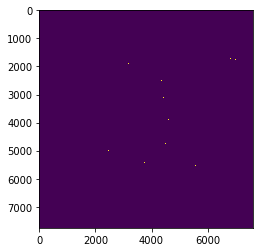

In [14]:
plt.imshow(img)